In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
from scripts.time_series_model_training import *

In [3]:
forecaster = TimeSeriesForecaster("../data/normalized_SPY_historical_data.csv")

In [4]:
SPY_df = forecaster._load_data()

In [5]:
forecaster.split_data()

In [6]:
xs, ys = forecaster.create_sequences(SPY_df, 90)

In [7]:
forecaster.train_arima()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5918.416, Time=0.44 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5963.330, Time=0.77 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5955.149, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5917.485, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-5974.855, Time=0.75 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-5974.413, Time=1.67 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-5973.472, Time=2.50 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5969.036, Time=0.87 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-5971.957, Time=1.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-5973.439, Time=0.35 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 9.047 seconds


In [8]:
forecaster.train_sarima()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=-4884.220, Time=0.17 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=-5274.967, Time=0.57 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=2.26 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=-4891.168, Time=0.20 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=-5422.025, Time=1.69 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=3.94 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=1.98 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=-5364.674, Time=0.39 sec
 ARIMA(2,1,0)(2,1,0)[5]             : AIC=-5438.800, Time=2.59 sec
 ARIMA(2,1,0)(1,1,0)[5]             : AIC=-5285.884, Time=1.40 sec
 ARIMA(2,1,0)(2,1,1)[5]             : AIC=inf, Time=5.95 sec
 ARIMA(2,1,0)(1,1,1)[5]             : AIC=inf, Time=4.90 sec
 ARIMA(3,1,0)(2,1,0)[5]             : AIC=-5437.897, Time=4.86 sec
 ARIMA(2,1,1)(2,1,0)[5]             : AIC=-5461.535, Time=5.63 sec
 ARIMA(2,1,1)(1,1,0)[5]             : AIC=inf, Ti

In [9]:
forecaster.train_lstm()

c:\Users\Ashis\Desktop\KAIM Program 2\week_11\week_11\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 129ms/step - loss: 0.2452 - val_loss: 0.0329
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - loss: 0.0187 - val_loss: 0.0534
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0156 - val_loss: 0.0232
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0124 - val_loss: 0.0358
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.0140 - val_loss: 0.0468
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0115 - val_loss: 0.0904
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0122 - val_loss: 0.0164
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0109 - val_loss: 0.0475
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0114 - val_loss: 0.0311
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0112 - val_loss: 0.0343
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0104 - val_loss: 0.0057
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0

In [10]:
forecaster.make_predictions()

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step


In [11]:
forecaster.evaluate_models()

Shape of test_data for ARIMA: (403,)
Shape of predictions for ARIMA: (403,)
Shape of test_data for SARIMA: (403,)
Shape of predictions for SARIMA: (403,)
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Shape of test_data for LSTM: (403,)
Shape of predictions for LSTM: (403,)


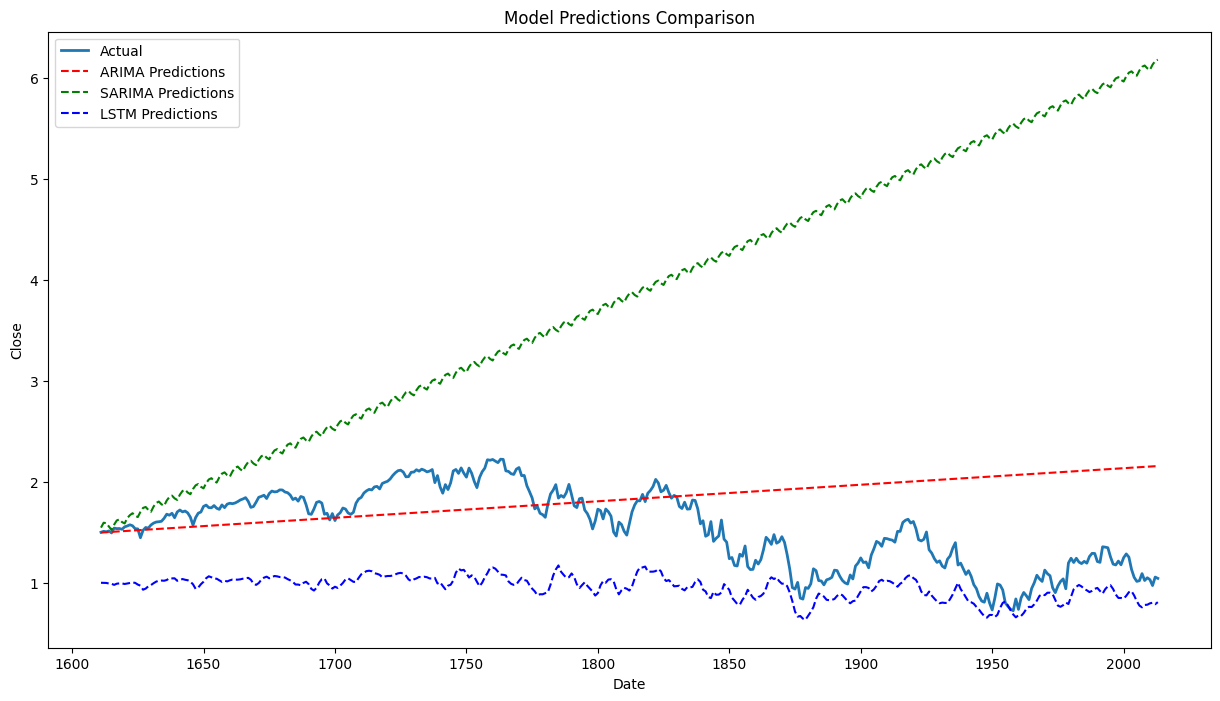

In [12]:
forecaster.plot_results()

In [13]:
forecaster.forecast_future()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━

{'LSTM': [0.82611966,
  0.75954443,
  0.69352233,
  0.6349995,
  0.5865741,
  0.54796475,
  0.51874465,
  0.49803066,
  0.48470312,
  0.47755563,
  0.47518772,
  0.4764105,
  0.4803707,
  0.48633236,
  0.49351805,
  0.50142527,
  0.5095515,
  0.5174788,
  0.5249095,
  0.5316694,
  0.5376448,
  0.5427705,
  0.5470138,
  0.5503964,
  0.5529715,
  0.55479366,
  0.55594164,
  0.55650723,
  0.55658877,
  0.5562851]}